## 1. Import the necessary libraries

In [1]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as trs
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [4]:
sns.set()

## 2. Read the data as a data frame

In [5]:
bdata = pd.read_csv("bank-full.csv")

In [6]:
bdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3. Perform basic EDA which should include the following and print out your insights at every step.

### a. Shape of the data

In [7]:
bdata.shape # displayes the number of rows and columns in the dataframe

(45211, 17)

There are 17 columns and 45211 rows of data

### b. Data type of each attribute

In [8]:
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


- The data has 45211 instances with 17 attributes. 7 integer type and 10 object type(Strings in the column) 

### c. Checking the presence of missing values

In [9]:
bdata.isna().apply(pd.value_counts) # to check for presence of missing values

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
False,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211


There are no signs of missing values

### d. 5 point summary of numerical attributes

In [10]:
bdata.describe().T # displays 5 point summary of numerical attributes

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


- Age columns shows that data all the customers are adults. Values for attribute age ranges from 18 to 85. The data is sweked with 75% of data equal to or below 48. The attribute contains outliers.
- The attribute balance contains negative values. The data is sweked and contains outliers. The 25th quartile is 72 and 75th quartile is 1428.
- day column contains last contact day of the month. The values range from 1 to 31 wiht 75% of values equal to or less than 21.
- duration column contains duration of last call made to customer in seconds. The values range from 0 to 4918 secs. The 0 values indicates that some of the customers were not contacted.
- campaign contains the number of times the customer was contacted during the campaign. The values range from 1 to 63. Since 75% of data is equal to or less than 3, the attribute values have outliers.
- pdays is the detail of the numbers of days passed since the last compaign. It contains values from -1 to 871. value 999 in the attribute means the customer was never contacted. Since there is no 999 in the given data, all the customers were contacted. It contains outliers.
- previous is the detail of the number of contacts performed for the client before this campaign. 75% of values are 0 indicates they were not contacted before this campaign.

#### Column Distribution

#### Row Distribution:

- age : age of the customer
- job : type of job of the customers
- marital : marital status of the customer
- education : education of the customer
- default : has credit in default?
- balance : average yearly balance in euros
- housing : whether customer has housing loan?
- loan : whether customer has personal loan?
- contact : contact communication type
- day : last contact day of the month
- month : last contact month of year
- duration : last contact duration in seconds
- campaign : number of contacts performed during this campaign and for this client.
- pdays : number of days passed by after the client was last contacted from a previous campaign.
- previous : number of contacts performed before this campaing and for this client.
- poutcome : outcome of the previous marketing campaign
- target : has the client subscribed a term deposit?

### Checking the presence of outliers

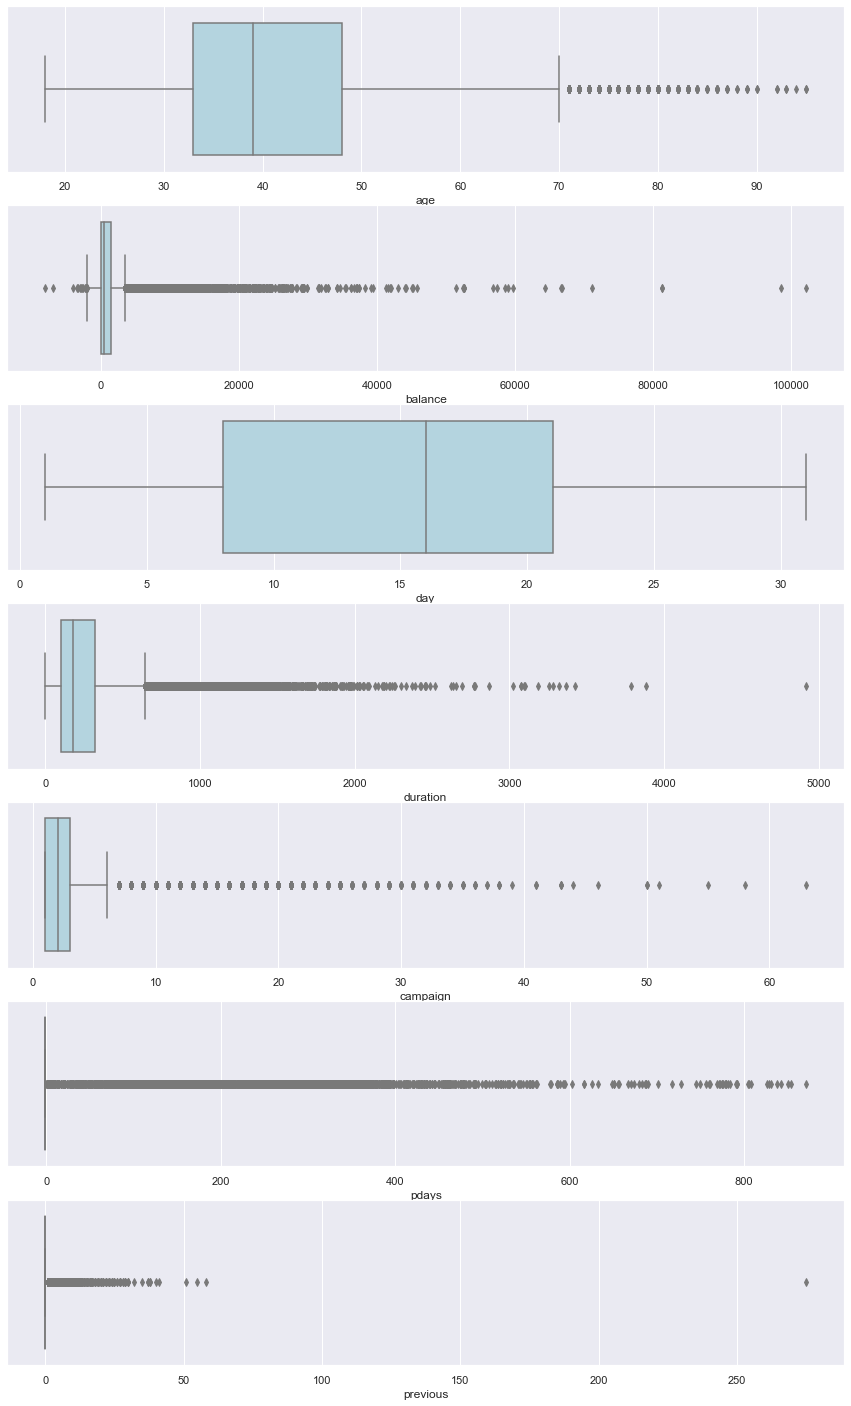

In [11]:
plt.figure(figsize= (15,25))
plt.subplot(7,1,1)
sns.boxplot(x= bdata.age, color='lightblue')

plt.subplot(7,1,2)
sns.boxplot(x= bdata.balance, color='lightblue')

plt.subplot(7,1,3)
sns.boxplot(x= bdata.day, color='lightblue')

plt.subplot(7,1,4)
sns.boxplot(x= bdata.duration, color='lightblue')

plt.subplot(7,1,5)
sns.boxplot(x= bdata.campaign, color='lightblue')

plt.subplot(7,1,6)
sns.boxplot(x= bdata.pdays, color='lightblue')

plt.subplot(7,1,7)
sns.boxplot(x= bdata.previous, color='lightblue')

plt.show()

Outliers are present in attributes such as age, balance, duration, campaign, pdays and previous.

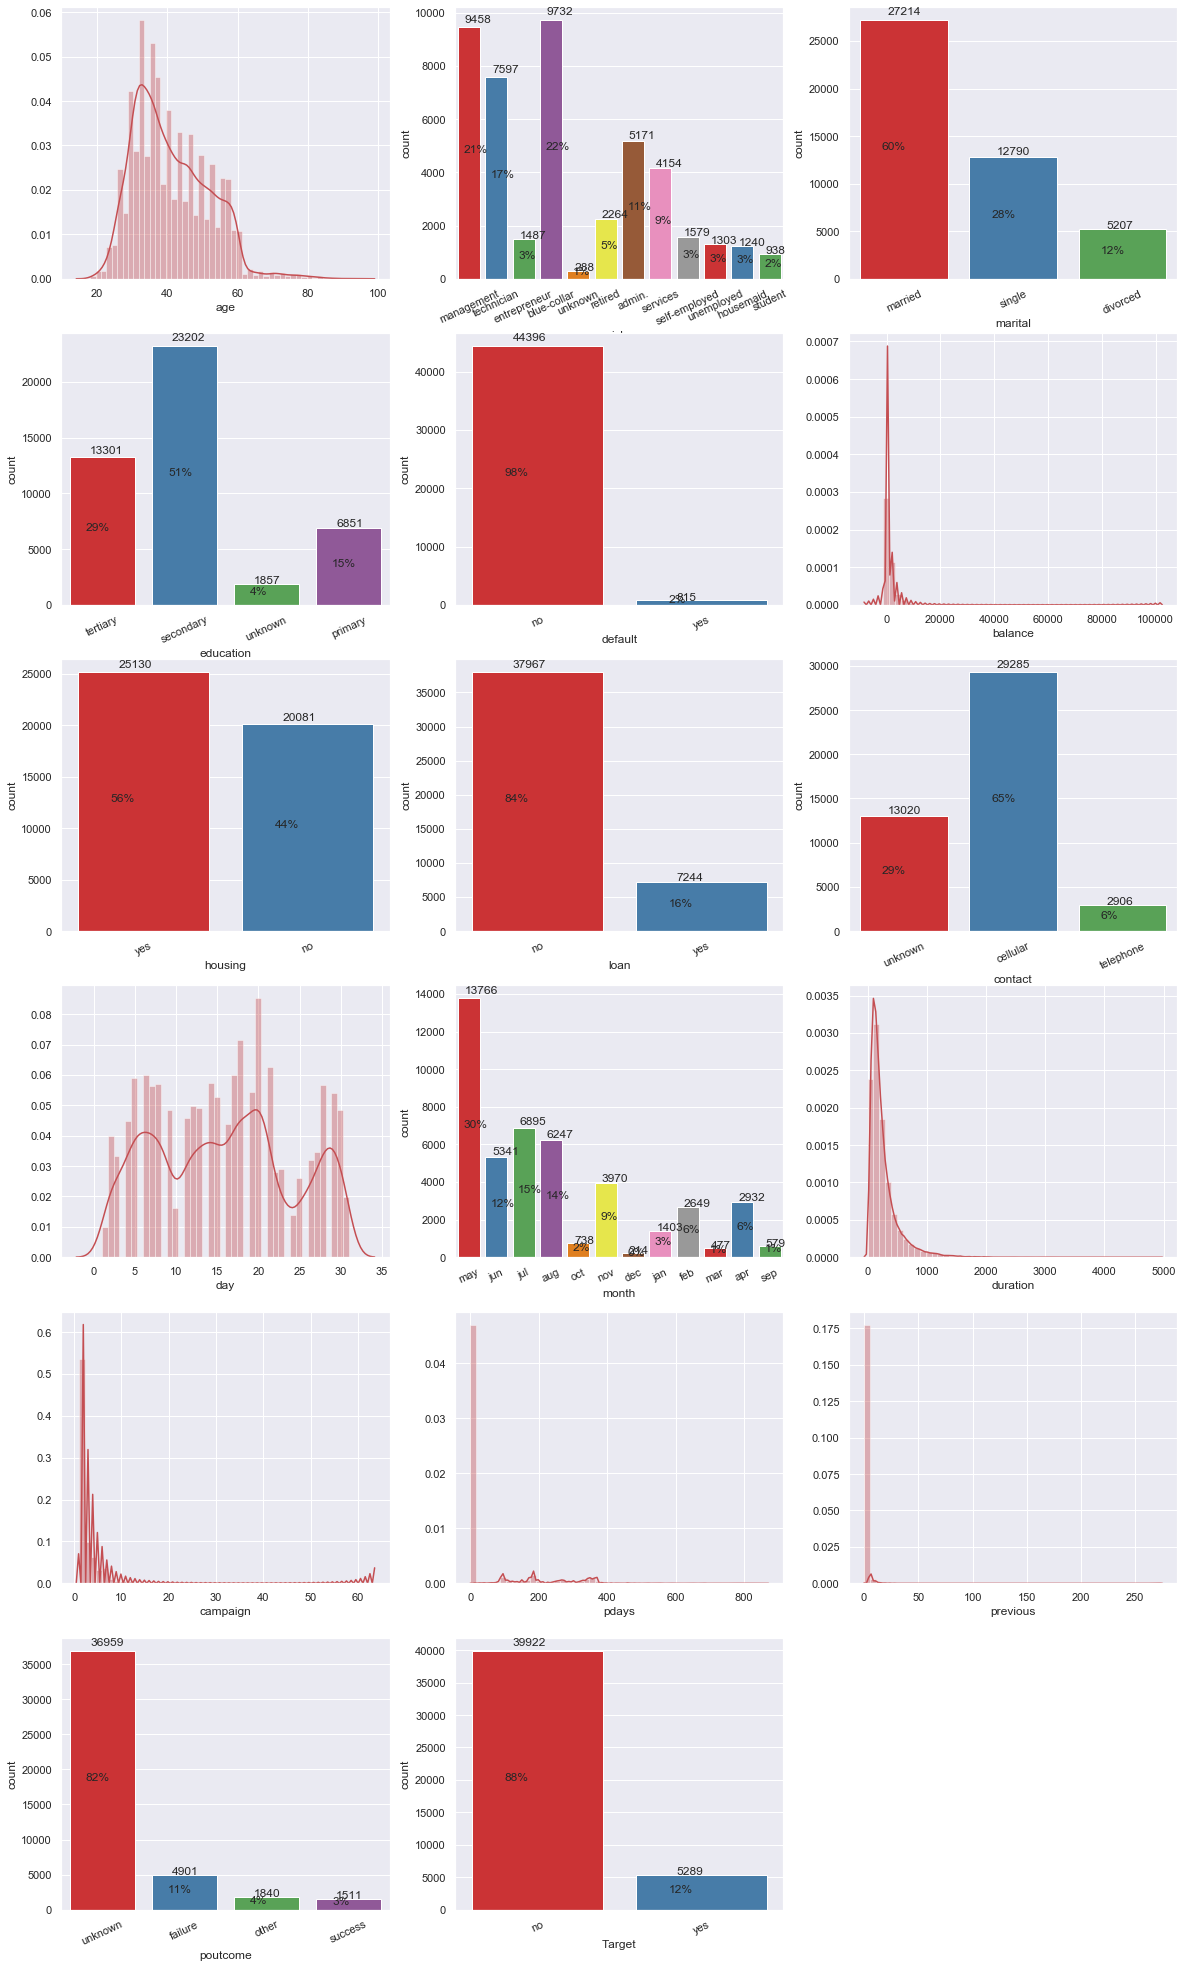

In [12]:
plt.figure(figsize=(20,35)) # set the figure size
pos = 1 # variable to manage the position of subplots
for feature in bdata.columns: # for loop to iterate each attribute
    plt.subplot(6,3,pos)
    if feature in ['age','balance','day','duration','campaign','pdays','previous']:
        sns.distplot(bdata[feature],color='r')
    else:
        ax = sns.countplot(bdata[feature],palette="Set1")
        ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
        for p in ax.patches:
            ax.annotate('{:1d}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()*1.02))
            ax.annotate('{:.0f}%'.format((p.get_height()/len(bdata.index))*100), (p.get_x()+0.2, p.get_height()/2))
    pos+=1

- age column has some outliers
- There are 288 rows with unknown values in job attribute. Highest number of customers are in jobs blue-collar, management and techinician
- Out of the total customers 60% are married, 28% are single and 11% are divorced
- Out of the total customers 51.3% are secondary educated, 29.4% are tertiary educated  and 15.2% are primary educated. The education details of 1857 (4.1%) customes are not known
- Out of the total customers, 44396(96.2%) of customers have no credit in default and remaning 815(1.8%) of customers have credit in default.
- 25130 (55.6%) of customers having housing loan and 20081(44.4%) of customers do not have housing loan
- 7244 (16%) of customers have personal loan and 37967 (84%) of customers do not have a
- Out of 45211 customers, the celluar contact information is known for 29285 (64.8%), telephone information is known for 2906 (6.4%) customers. There is no contact information for 13020 (28.8%) customers.
- Most of the customers i.e., 30% of customers were contacted in May. Least number of customers were contacted in march, october and december.
- The outcome of previous marketing campaign is not known for 36959 (81.7%) of customers. It was failure for 4901 (10.8%) of customers. It was success in case of 1511 (3.3%) of customers
- 5289 (11.7%) of customers have subscribed for term deposit and 39922(88.3%) of customers have not subscribed
- balance, duration, campaign, pdays and previous contains many outliers.

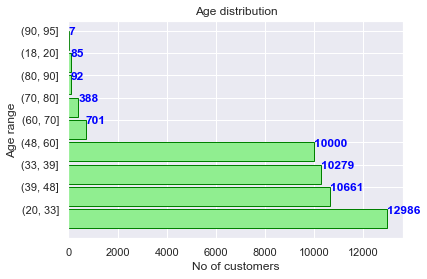

In [13]:
x = pd.IntervalIndex.from_tuples([(18,20),(20,33),(33,39),(39,48),(48,60),(60,70),(70,80),(80,90),(90,95)])
y = pd.cut(bdata['age'],x).value_counts()
fig,ax = plt.subplots()
width = 0.85
ind = np.arange(len(y))
ax.barh(ind,y.values,width,color="lightgreen",edgecolor="green")
ax.set_yticks(ind+width/2)
plt.title('Age distribution')
plt.ylabel('Age range')
plt.xlabel('No of customers')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    ax.set_yticklabels(y.index, minor=False)

In [14]:
bins1 = pd.IntervalIndex.from_tuples([(-10000,-5001),(-5000,-2501),(-2500,-1501),(-1500,-1001),(-1000,-501),(-500,0),(0,500),(501,1000),(1001,1500),(1501,2000),(2001,2500),(2501,3000),(3001,3500),(3501,4000),(4001,4500),(4501,5000),(5001,5500),(5501,6000),(6001,6500),(6501,7000),(7001,8000),(8001,9000),(9001,10000),(10001,102500)])
print(pd.cut(bdata['balance'],bins1).value_counts())

(0, 500]           16385
(501, 1000]         6895
(-500, 0]           6584
(1001, 1500]        3731
(1501, 2000]        2388
(2001, 2500]        1625
(2501, 3000]        1260
(3001, 3500]         962
(10001, 102500]      829
(3501, 4000]         749
(-1000, -501]        549
(4001, 4500]         547
(4501, 5000]         506
(5001, 5500]         407
(7001, 8000]         347
(5501, 6000]         329
(8001, 9000]         285
(6001, 6500]         258
(6501, 7000]         224
(9001, 10000]        163
(-1500, -1001]        96
(-2500, -1501]        38
(-5000, -2501]         7
(-10000, -5001]        2
Name: balance, dtype: int64


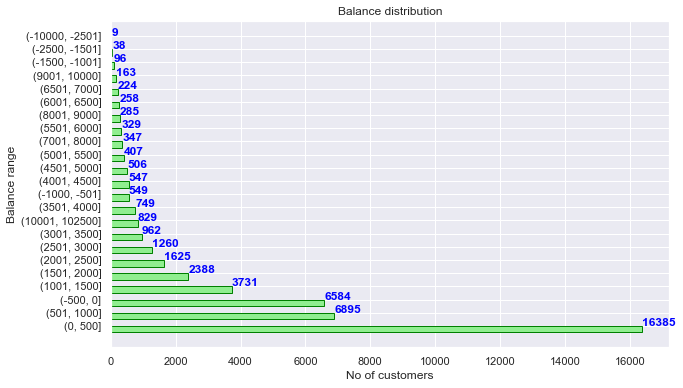

In [15]:
bins1 = pd.IntervalIndex.from_tuples([(-10000,-2501),(-2500,-1501),(-1500,-1001),(-1000,-501),(-500,0),(0,500),(501,1000),(1001,1500),(1501,2000),(2001,2500),(2501,3000),(3001,3500),(3501,4000),(4001,4500),(4501,5000),(5001,5500),(5501,6000),(6001,6500),(6501,7000),(7001,8000),(8001,9000),(9001,10000),(10001,102500)])
bal = pd.cut(bdata['balance'],bins1).value_counts()

fig,ax = plt.subplots(figsize=(10,6))
width = 0.5
ind = np.arange(len(bal))
ax.barh(ind,bal.values,width,color="lightgreen",edgecolor="green")
ax.set_yticks(ind+width/2)
plt.title('Balance distribution')
plt.ylabel('Balance range')
plt.xlabel('No of customers')
for i, v in enumerate(bal):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    ax.set_yticklabels(bal.index, minor=False)

In [16]:
bdata.groupby(["Target"]).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


### The data set is skewed in terms of target column.
### There are far few records in yes i.e. people who subscribed to term deposit. But that is the class of interst to us! We have to identify potential customers and do not want any potential customer to be missed. 

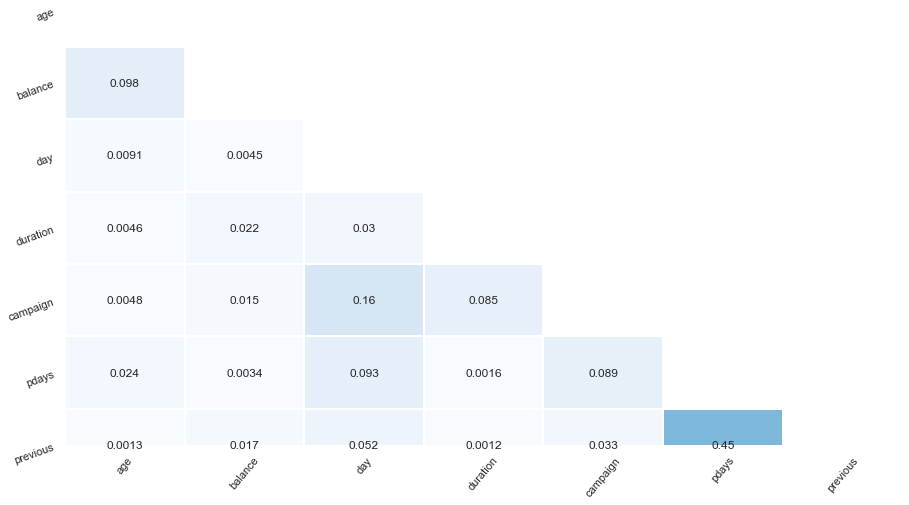

In [17]:
# Correlation among the attributes

corr = abs(bdata.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

## Corelation of all other features with the outcome

In [18]:
bdata_target = copy.deepcopy(bdata)

In [19]:
bdata_target['Target'] = bdata_target['Target'].replace({'yes':1,'no':0}, inplace = False)

In [20]:
bdata_target.groupby(['Target']).count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
0,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
1,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


In [21]:
bdata_target.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [22]:
bdata_target[['job', 'Target']].groupby("job").mean().reset_index()

,job,Target
0,admin.,0.122027
1,blue-collar,0.072750
2,entrepreneur,0.082717
3,housemaid,0.087903
4,management,0.137556
5,retired,0.227915
6,self-employed,0.118429
7,services,0.088830
8,student,0.286780
9,technician,0.110570


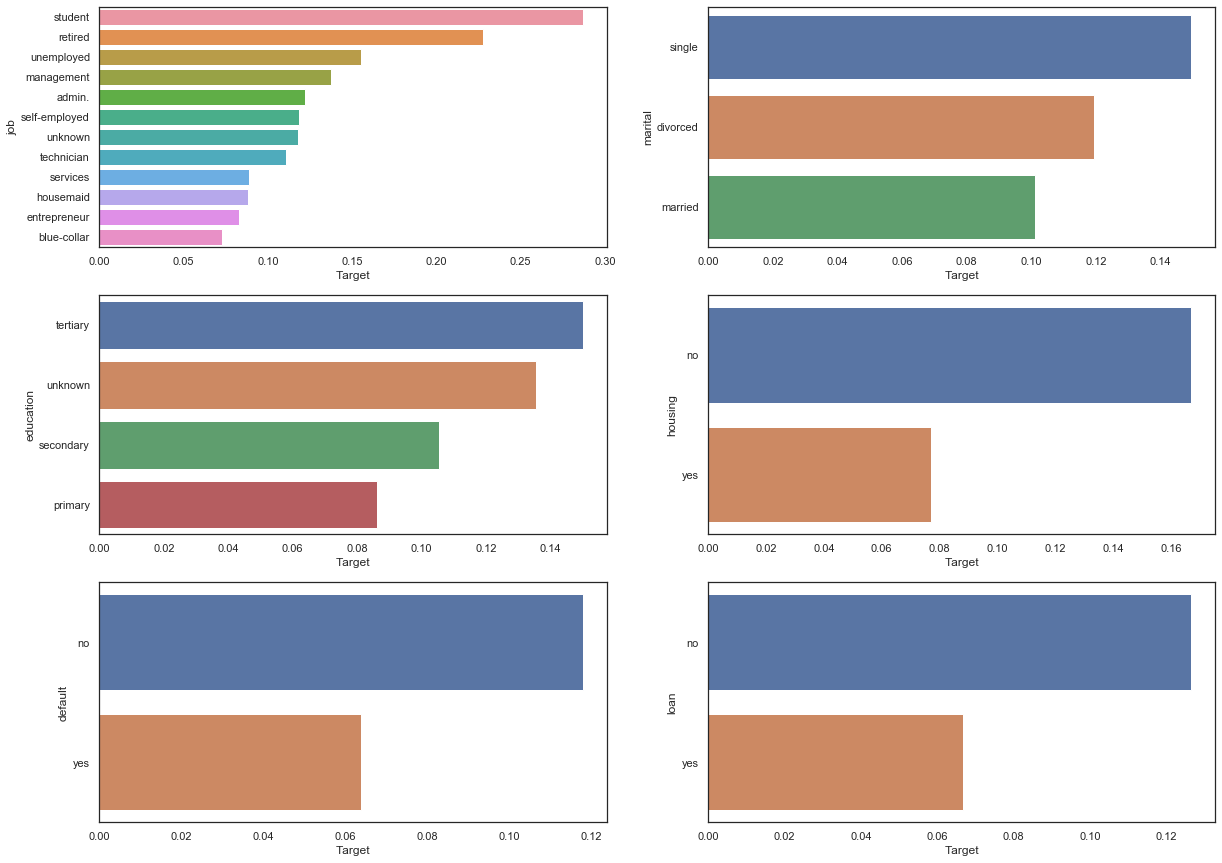

In [23]:
plt.figure(figsize=(20,15)) # set the figure size
plt.subplot(3,2,1)
some_data = bdata_target[['job', 'Target']].groupby("job").mean().reset_index().sort_values("Target", ascending=False)
sns.barplot(y = "job", x = 'Target',data = some_data)
plt.subplot(3,2,2)
some_data = bdata_target[['marital', 'Target']].groupby("marital").mean().reset_index().sort_values("Target", ascending=False)
sns.barplot(y = "marital", x = 'Target',data = some_data)
plt.subplot(3,2,3)
some_data = bdata_target[['education', 'Target']].groupby("education").mean().reset_index().sort_values("Target", ascending=False)
sns.barplot(y = "education", x = 'Target',data = some_data)
plt.subplot(3,2,4)
some_data = bdata_target[['housing', 'Target']].groupby("housing").mean().reset_index().sort_values("Target", ascending=False)
sns.barplot(y = "housing", x = 'Target',data = some_data)
plt.subplot(3,2,5)
some_data = bdata_target[['default', 'Target']].groupby("default").mean().reset_index().sort_values("Target", ascending=False)
sns.barplot(y = "default", x = 'Target',data = some_data)
plt.subplot(3,2,6)
some_data = bdata_target[['loan', 'Target']].groupby("loan").mean().reset_index().sort_values("Target", ascending=False)
sns.barplot(y = "loan", x = 'Target',data = some_data)

In [24]:
bdata_target.groupby("Target").mean().reset_index()

,Target,age,balance,day,duration,campaign,pdays,previous
0,0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


Observations:

    * Average balance of subscribers for term deposit is more than non subscribers
    * Average duration of call is also more more those with Target = 1
    * Average number of days passed since last contact(pdays) is also high for those with Target = 1.


In [25]:
pd.DataFrame(abs(bdata_target.corr()['Target']).reset_index().sort_values('Target',ascending = False))

,index,Target
7,Target,1.000000
3,duration,0.394521
5,pdays,0.103621
6,previous,0.093236
4,campaign,0.073172
1,balance,0.052838
2,day,0.028348
0,age,0.025155


Duration is the most corelated feature with Target

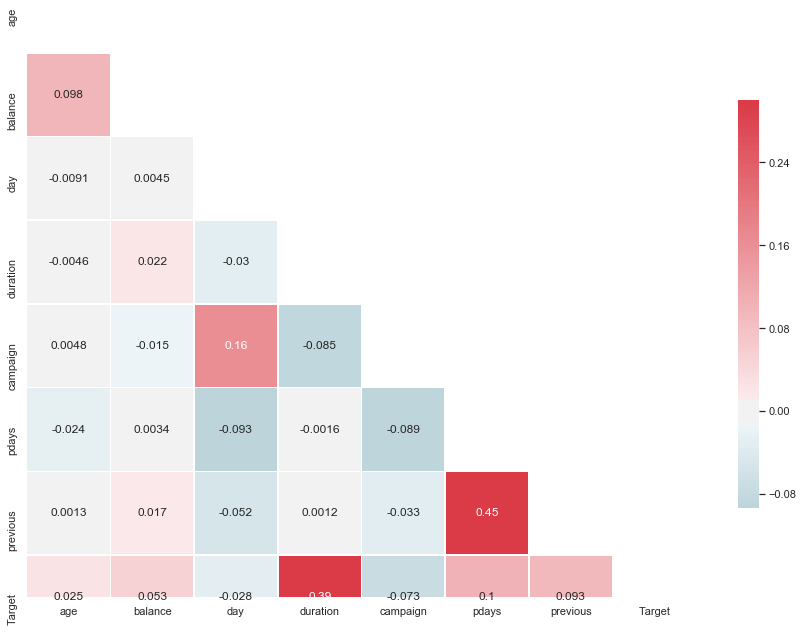

In [26]:
# Compute the correlation matrix
corr = bdata_target.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

In [27]:
bdata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

## Dealing with missing values

 - **The job of 288 (1%) of customers are not known. Since we cannot find their jobs, we can assume them to be unemployed**
 - **The education of 1857(4%) of customers are not known. Assuming they might have atleast had primary education, the unknow are converted to primary**
 - **82% of poutcome column is unknown. Since most of the values are not known, we can drop the column**

In [28]:
bdata['job'] = bdata.job.replace(to_replace = 'unknown', value = 'unemployed') #replace unknown jobs with unemployed
bdata['education'] = bdata.education.replace(to_replace = 'unknown', value = 'primary') # replace unknow eduction with primary
bdata.drop(['poutcome'], axis=1, inplace = True) #dropping the poutcome columns since it has mostly unknown data
bdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'Target'],
      dtype='object')

## Dealing with Outliers

- **The continous value attributes such as age, balance, duration, campaign, pdays and previous contains outliers.**
- **These are hence standardized using scalar function before proceeding further**

# Prepare data for training
- **One-hot encode or Label encoder depending on the categorical attributes**
- **Standardize the continuous attributes to account for outliers**
- **Seperate Predictors from the target**
- **Split the data into test and train sets**

In [29]:
bdata_encoded = copy.deepcopy(bdata) #creating a copy of the dataframe under bdata_encoded

In [30]:
bdata_encoded.loc[:,['default','housing','loan','Target']] = bdata_encoded.loc[:,['default','housing','loan','Target']].apply(LabelEncoder().fit_transform) 

In [31]:
bdata_encoded = pd.get_dummies(bdata_encoded, columns= ['job','marital','education','contact','month'], drop_first=True)

In [32]:
# Seperating the variables into predictors and target
# independant variables
X = bdata_encoded.drop(['Target'], axis=1)
# the dependent variable
y = bdata_encoded[['Target']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y) # Split data into test and train

# fitting a scaler function to scale test and train to avoid data leakage aka to keep the sanctity of the test data

scaler = StandardScaler()   # A scaler function

#fitting the scaler funstion with train set
scaler.fit(X_train.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])

X_train_scaled = scaler.transform(X_train.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])
X_test_scaled = scaler.transform(X_test.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])


X_train.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = X_train_scaled 
X_test.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = X_test_scaled

C:\Users\Welcome\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## 5. Train a few standard classification algorithms, note and comment on their performance along different metrics.

In [34]:
def train_n_fit(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    train_score = round(model.score(X_train,y_train),3)
    test_score = round(model.score(X_test,y_test),3)
    tn,fp,fn,tp = metrics.confusion_matrix(y_test,pred).ravel()
    cm = metrics.confusion_matrix(y_test,pred,labels=[1, 0])
    recall = round(tp/(tp+fn),3)
    precision = round(tp/(tp+fp),3)
    specificity = round(tn/(tn+fp),3)
    f1_score = round(2*precision*recall/(precision+recall),3)

    return train_score,test_score,recall,precision,specificity,f1_score,cm

In [35]:
plt.figure(figsize=(20,35)) # set the figure size

def conf_mat(cm):
    
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
    
    ax = sns.heatmap(df_cm, annot=True, linewidths=0.25, fmt= '1d', cmap="YlGnBu")
    
    for t in ax.texts[0:2]:
        trans = t.get_transform()
        offs = trs.ScaledTranslation(-0.05,0.25,trs.IdentityTransform())
        t.set_transform( offs + trans )
    for t in ax.texts[2:4]:
        trans = t.get_transform()
        offs = trs.ScaledTranslation(-0.05,-0.25,trs.IdentityTransform())
        t.set_transform( offs + trans )
    plt.show()


<Figure size 1440x2520 with 0 Axes>

In [36]:
lr = LogisticRegression(solver='liblinear')
lr_tr_accuracy,lr_te_accuracy,lr_recall,lr_precision,lr_specificity,lr_f1_score,lr_cm = train_n_fit(lr,X_train,X_test,y_train,y_test)

knn = KNeighborsClassifier()
knn_tr_accuracy,knn_te_accuracy,knn_recall,knn_precision,knn_specificity,knn_f1_score,f1_cm = train_n_fit(knn,X_train,X_test,y_train,y_test)

nb = GaussianNB()
nb_tr_accuracy,nb_te_accuracy,nb_recall,nb_precision,nb_specificity,nb_f1_score,nb_cm = train_n_fit(nb,X_train,X_test,y_train,y_test)

svm = SVC(gamma='auto', kernel='poly', degree = 2)
svm_tr_accuracy,svm_te_accuracy,svm_recall,svm_precision,svm_specificity,svm_f1_score,svm_cm = train_n_fit(svm,X_train,X_test,y_train,y_test)



C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

In [37]:
 result1 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                         'Training data Accuracy': [lr_tr_accuracy,knn_tr_accuracy, nb_tr_accuracy, svm_tr_accuracy],
                          'Test data Accuracy': [ lr_te_accuracy ,  knn_te_accuracy ,  nb_te_accuracy ,  svm_te_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result1

,Model,Training data Accuracy,Test data Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.896,0.893,0.279,0.586,0.974,0.378
1,KNN,0.920,0.890,0.300,0.552,0.968,0.389
2,Naive Bayes',0.863,0.860,0.397,0.400,0.921,0.398
3,SVM,0.892,0.890,0.138,0.638,0.990,0.227


Confusion matrix for Logistic Regression


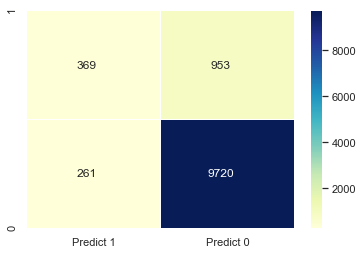

Confusion matrix for KNN


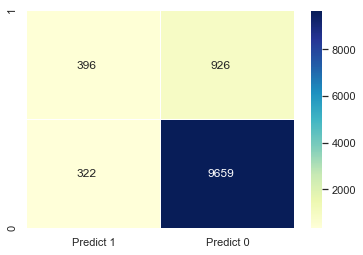

Confusion matrix for Naive Bayes


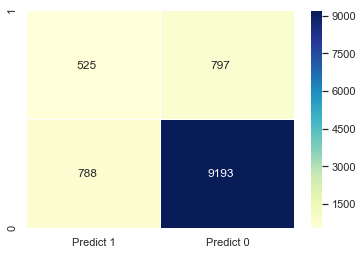

Confusion matrix for Support Vector Machine


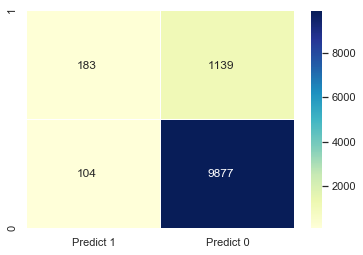

In [38]:
print("Confusion matrix for Logistic Regression")
conf_mat(lr_cm)

print("Confusion matrix for KNN")
conf_mat(f1_cm)
print("Confusion matrix for Naive Bayes")
conf_mat(nb_cm)
print("Confusion matrix for Support Vector Machine")
conf_mat(svm_cm)


## 6. Build the ensemble models and compare the results with the base models.

In [39]:
def ensem_n_fit(model,X_train1,y_train1):
    model.fit(X_train1,y_train1)
    pred1 = model.predict(X_test)
    train1_score = round(model.score(X_train1,y_train1),3)
    test1_score = round(model.score(X_test,y_test),3)
    tn1,fp1,fn1,tp1 = metrics.confusion_matrix(y_test,pred1).ravel()
    cm1 = metrics.confusion_matrix(y_test,pred1,labels=[1, 0])
    recall1 = round(tp1/(tp1+fn1),3)
    precision1 = round(tp1/(tp1+fp1),3)
    specificity1= round(tn1/(tn1+fp1),3)
    f1_score1 = round(2*precision1*recall1/(precision1+recall1),3)

    return train1_score,test1_score,recall1,precision1,specificity1,f1_score1,cm1

In [40]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dt_tr_accuracy,dt_te_accuracy,dt_recall,dt_precision,dt_specificity,dt_f1_score,dt_cm = ensem_n_fit(dTree,X_train,y_train)

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dtr_tr_accuracy,dtr_te_accuracy,dtr_recall,dtr_precision,dtr_specificity,dtr_f1_score,dtr_cm = ensem_n_fit(dTreeR,X_train,y_train)

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bg_tr_accuracy,bg_te_accuracy,bg_recall,bg_precision,bg_specificity,bg_f1_score,bg_cm = ensem_n_fit(bgcl,X_train,y_train)

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
ab_tr_accuracy,ab_te_accuracy,ab_recall,ab_precision,ab_specificity,ab_f1_score,ab_cm = ensem_n_fit(abcl,X_train,y_train)

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gb_tr_accuracy,gb_te_accuracy,gb_recall,gb_precision,gb_specificity,gb_f1_score,gb_cm = ensem_n_fit(gbcl,X_train,y_train)

rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rf_tr_accuracy,rf_te_accuracy,rf_recall,rf_precision,rf_specificity,rf_f1_score,rf_cm = ensem_n_fit(rfcl,X_train,y_train)

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

In [41]:
result_en = pd.DataFrame({'Model' : ['dTree', 'dTreeR', 'Bagging', 'Ada Boosting', 'Gradient Boosting','Random Forest'],
                         'Training data Accuracy': [dt_tr_accuracy,dtr_tr_accuracy, bg_tr_accuracy, ab_tr_accuracy, gb_tr_accuracy, rf_tr_accuracy],
                          'Test data Accuracy': [dt_te_accuracy ,dtr_te_accuracy ,bg_te_accuracy ,ab_te_accuracy,gb_te_accuracy, rf_te_accuracy],
                          'Recall' : [dt_recall ,  dtr_recall ,  bg_recall, ab_recall, gb_recall,rf_recall ],
                          'Precision': [dt_precision ,dtr_precision ,bg_precision ,ab_precision, gb_precision,rf_recall ],
                          'Specificity': [dt_specificity ,dtr_specificity,bg_specificity,ab_specificity,gb_specificity,rf_specificity],
                          'F1 Score' : [dt_f1_score,dtr_f1_score,bg_f1_score,ab_f1_score,gb_f1_score,rf_f1_score]})
result_en

,Model,Training data Accuracy,Test data Accuracy,Recall,Precision,Specificity,F1 Score
0,dTree,1.000,0.871,0.470,0.452,0.924,0.461
1,dTreeR,0.890,0.888,0.191,0.564,0.980,0.285
2,Bagging,1.000,0.902,0.445,0.608,0.962,0.514
3,Ada Boosting,0.888,0.885,0.309,0.517,0.962,0.387
4,Gradient Boosting,0.903,0.897,0.315,0.621,0.975,0.418
5,Random Forest,1.000,0.903,0.437,0.437,0.965,0.514


Confusion matrix for Decision Tree


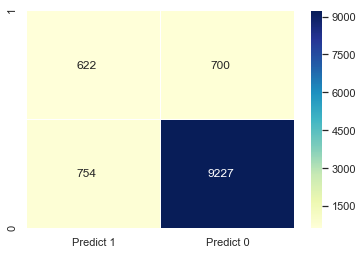

Confusion matrix for Regularized Decision Tree


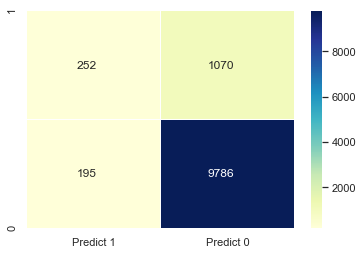

Confusion matrix for Bagging


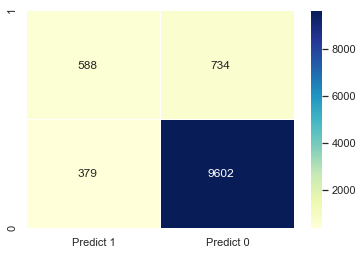

Confusion matrix for Ada Boosting


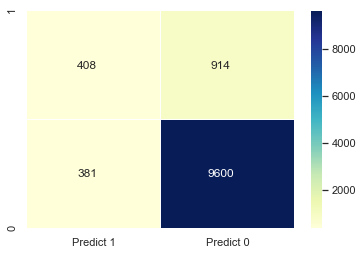

Confusion matrix for Gradient Boosting


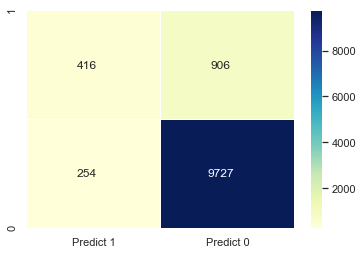

Confusion matrix for Random Forest


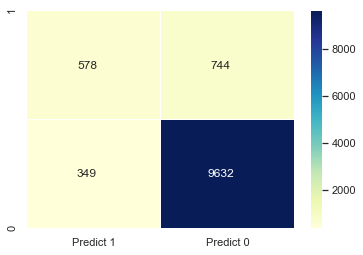

In [42]:
print("Confusion matrix for Decision Tree")
conf_mat(dt_cm)

print("Confusion matrix for Regularized Decision Tree")
conf_mat(dtr_cm)
print("Confusion matrix for Bagging")
conf_mat(bg_cm)
print("Confusion matrix for Ada Boosting")
conf_mat(ab_cm)
print("Confusion matrix for Gradient Boosting")
conf_mat(gb_cm)
print("Confusion matrix for Random Forest")
conf_mat(rf_cm)

Only ~11% of the respondents to the campaign have actually subscribed for a deposit, which makes the overall dataset highly imbalanced, and which can potentially lead to the model predicting just one class (the dominant one).

Hence, we will create two datasets, an upsampled and a downsampled one, and test models on them.

#### An unsampled dataset

In [43]:
# separating the data into two different datasets
bdata_majority = bdata_encoded[bdata_encoded.Target == 0]
bdata_minority = bdata_encoded[bdata_encoded.Target == 1]

#upsampling the minority dataset
bdata_minority_upsampled = resample (bdata_minority, replace = True, n_samples = 39922, random_state=42)

In [44]:
#concatenating the two datasaets
bdata_upsampled = pd.concat([bdata_majority,bdata_minority_upsampled])
                                     
#new dataset counts
bdata_upsampled.Target.value_counts()

1    39922
0    39922
Name: Target, dtype: int64

In [45]:
# Seperating the variables into predictors and target
# independant variables
X = bdata_upsampled.drop(['Target'], axis=1)
# the dependent variable
y = bdata_upsampled[['Target']]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y) # Split data into test and train

# fitting a scaler function to scale test and train to avoid data leakage aka to keep the sanctity of the test data

scaler = StandardScaler()   # A scaler function

#fitting the scaler funstion with train set
scaler.fit(X_train.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])

X_train_scaled = scaler.transform(X_train.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])
X_test_scaled = scaler.transform(X_test.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])


X_train.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = X_train_scaled 
X_test.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = X_test_scaled

C:\Users\Welcome\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
lr = LogisticRegression(solver='liblinear')
lr_tr_accuracy,lr_te_accuracy,lr_recall,lr_precision,lr_specificity,lr_f1_score,lr_cm = train_n_fit(lr,X_train,X_test,y_train,y_test)

knn = KNeighborsClassifier()
knn_tr_accuracy,knn_te_accuracy,knn_recall,knn_precision,knn_specificity,knn_f1_score,f1_cm = train_n_fit(knn,X_train,X_test,y_train,y_test)

nb = GaussianNB()
nb_tr_accuracy,nb_te_accuracy,nb_recall,nb_precision,nb_specificity,nb_f1_score,nb_cm = train_n_fit(nb,X_train,X_test,y_train,y_test)

svm = SVC(gamma='auto', kernel='poly', degree = 2)
svm_tr_accuracy,svm_te_accuracy,svm_recall,svm_precision,svm_specificity,svm_f1_score,svm_cm = train_n_fit(svm,X_train,X_test,y_train,y_test)


C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

In [48]:
result2 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                         'Training data Accuracy': [lr_tr_accuracy,knn_tr_accuracy, nb_tr_accuracy, svm_tr_accuracy],
                          'Test data Accuracy': [ lr_te_accuracy ,  knn_te_accuracy ,  nb_te_accuracy ,  svm_te_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result2

,Model,Training data Accuracy,Test data Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.823,0.825,0.819,0.828,0.830,0.823
1,KNN,0.939,0.913,0.978,0.865,0.848,0.918
2,Naive Bayes',0.691,0.695,0.495,0.824,0.894,0.618
3,SVM,0.858,0.858,0.896,0.833,0.820,0.863


Confusion matrix for Logistic Regression


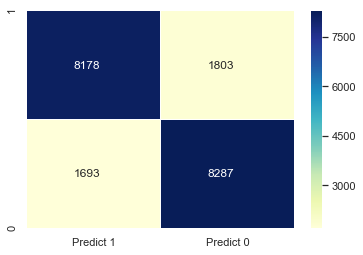

Confusion matrix for KNN


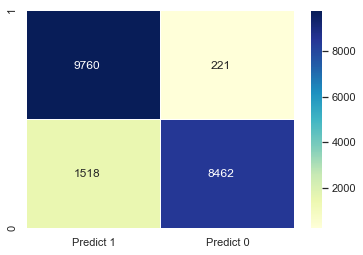

Confusion matrix for Naive Bayes


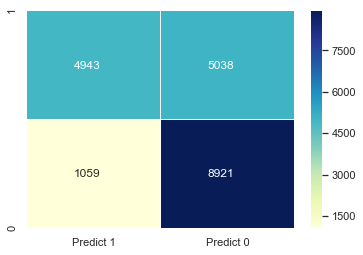

Confusion matrix for Support Vector Machine


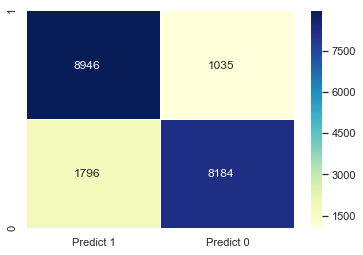

In [49]:
print("Confusion matrix for Logistic Regression")
conf_mat(lr_cm)

print("Confusion matrix for KNN")
conf_mat(f1_cm)
print("Confusion matrix for Naive Bayes")
conf_mat(nb_cm)
print("Confusion matrix for Support Vector Machine")
conf_mat(svm_cm)

In [50]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dt_tr_accuracy,dt_te_accuracy,dt_recall,dt_precision,dt_specificity,dt_f1_score,dt_cm = ensem_n_fit(dTree,X_train,y_train)

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dtr_tr_accuracy,dtr_te_accuracy,dtr_recall,dtr_precision,dtr_specificity,dtr_f1_score,dtr_cm = ensem_n_fit(dTreeR,X_train,y_train)

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bg_tr_accuracy,bg_te_accuracy,bg_recall,bg_precision,bg_specificity,bg_f1_score,bg_cm = ensem_n_fit(bgcl,X_train,y_train)

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
ab_tr_accuracy,ab_te_accuracy,ab_recall,ab_precision,ab_specificity,ab_f1_score,ab_cm = ensem_n_fit(abcl,X_train,y_train)

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gb_tr_accuracy,gb_te_accuracy,gb_recall,gb_precision,gb_specificity,gb_f1_score,gb_cm = ensem_n_fit(gbcl,X_train,y_train)

rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rf_tr_accuracy,rf_te_accuracy,rf_recall,rf_precision,rf_specificity,rf_f1_score,rf_cm = ensem_n_fit(rfcl,X_train,y_train)

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

In [51]:
result_en2 = pd.DataFrame({'Model' : ['dTree', 'dTreeR', 'Bagging', 'Ada Boosting', 'Gradient Boosting','Random Forest'],
                         'Training data Accuracy': [dt_tr_accuracy,dtr_tr_accuracy, bg_tr_accuracy, ab_tr_accuracy, gb_tr_accuracy, rf_tr_accuracy],
                          'Test data Accuracy': [dt_te_accuracy ,dtr_te_accuracy ,bg_te_accuracy ,ab_te_accuracy,gb_te_accuracy, rf_te_accuracy],
                          'Recall' : [dt_recall ,  dtr_recall ,  bg_recall, ab_recall, gb_recall,rf_recall ],
                          'Precision': [dt_precision ,dtr_precision ,bg_precision ,ab_precision, gb_precision,rf_recall ],
                          'Specificity': [dt_specificity ,dtr_specificity,bg_specificity,ab_specificity,gb_specificity,rf_specificity],
                          'F1 Score' : [dt_f1_score,dtr_f1_score,bg_f1_score,ab_f1_score,gb_f1_score,rf_f1_score]})
result_en2

,Model,Training data Accuracy,Test data Accuracy,Recall,Precision,Specificity,F1 Score
0,dTree,1.000,0.960,0.999,0.927,0.921,0.962
1,dTreeR,0.784,0.783,0.888,0.734,0.679,0.804
2,Bagging,1.000,0.960,0.999,0.927,0.921,0.962
3,Ada Boosting,0.791,0.794,0.825,0.776,0.762,0.800
4,Gradient Boosting,0.846,0.848,0.882,0.825,0.813,0.853
5,Random Forest,1.000,0.964,1.000,1.000,0.928,0.965


Confusion matrix for Decision Tree


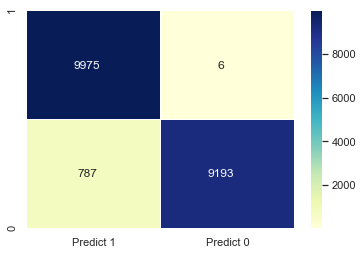

Confusion matrix for Regularized Decision Tree


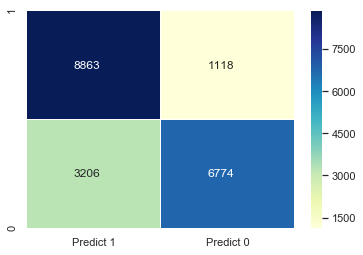

Confusion matrix for Bagging


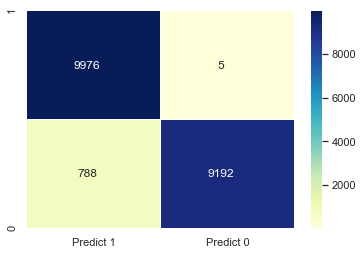

Confusion matrix for Ada Boosting


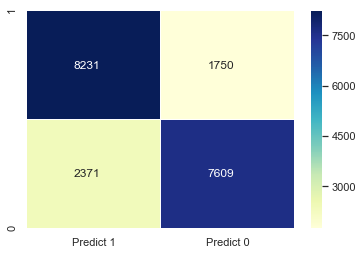

Confusion matrix for Gradient Boosting


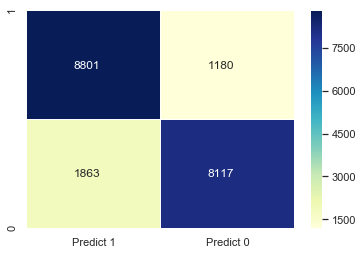

Confusion matrix for Random Forest


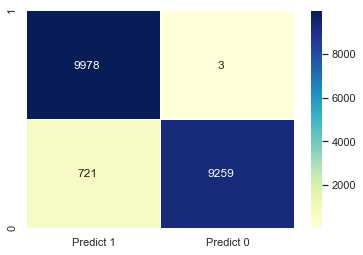

In [52]:
print("Confusion matrix for Decision Tree")
conf_mat(dt_cm)

print("Confusion matrix for Regularized Decision Tree")
conf_mat(dtr_cm)
print("Confusion matrix for Bagging")
conf_mat(bg_cm)
print("Confusion matrix for Ada Boosting")
conf_mat(ab_cm)
print("Confusion matrix for Gradient Boosting")
conf_mat(gb_cm)
print("Confusion matrix for Random Forest")
conf_mat(rf_cm)

The random forest classifier for upsampled data has a recall and precision of 1 and F1 score is 0.967. The test data accuracy is 0.966

Though the upsampled data has better accuracy, recall and precision than the original data, the cost of computation is high also there is a problem of overfit.

Lets try with downsampling the majorit data i.e., data with Target no

#### Downsampling data set

In [53]:
#downsampling the majority dataset
bdata_majority_downsampled = resample(bdata_majority,replace=True,n_samples=5289, random_state=42)

#concatenating the two datasets
bdata_downsampled = pd.concat([bdata_majority_downsampled,bdata_minority])

#new dataset counts
bdata_downsampled.Target.value_counts()

1    5289
0    5289
Name: Target, dtype: int64

In [54]:
# Seperating the variables into predictors and target
# independant variables
X = bdata_downsampled.drop(['Target'], axis=1)
# the dependent variable
y = bdata_downsampled[['Target']]

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, stratify = y) # Split data into test and train

# fitting a scaler function to scale test and train to avoid data leakage aka to keep the sanctity of the test data

scaler = StandardScaler()   # A scaler function

#fitting the scaler funstion with train set
scaler.fit(X_train.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])

X_train_scaled = scaler.transform(X_train.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])
X_test_scaled = scaler.transform(X_test.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']])


X_train.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = X_train_scaled 
X_test.loc[:,['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']] = X_test_scaled

C:\Users\Welcome\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [56]:
lr = LogisticRegression(solver='liblinear')
lr_tr_accuracy,lr_te_accuracy,lr_recall,lr_precision,lr_specificity,lr_f1_score,lr_cm = train_n_fit(lr,X_train,X_test,y_train,y_test)

knn = KNeighborsClassifier()
knn_tr_accuracy,knn_te_accuracy,knn_recall,knn_precision,knn_specificity,knn_f1_score,f1_cm = train_n_fit(knn,X_train,X_test,y_train,y_test)

nb = GaussianNB()
nb_tr_accuracy,nb_te_accuracy,nb_recall,nb_precision,nb_specificity,nb_f1_score,nb_cm = train_n_fit(nb,X_train,X_test,y_train,y_test)

svm = SVC(gamma='auto', kernel='poly', degree = 2)
svm_tr_accuracy,svm_te_accuracy,svm_recall,svm_precision,svm_specificity,svm_f1_score,svm_cm = train_n_fit(svm,X_train,X_test,y_train,y_test)


C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y

In [57]:
result3 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                         'Training data Accuracy': [lr_tr_accuracy,knn_tr_accuracy, nb_tr_accuracy, svm_tr_accuracy],
                          'Test data Accuracy': [ lr_te_accuracy ,  knn_te_accuracy ,  nb_te_accuracy ,  svm_te_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
result3

,Model,Training data Accuracy,Test data Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.823,0.817,0.819,0.816,0.815,0.817
1,KNN,0.870,0.797,0.771,0.814,0.824,0.792
2,Naive Bayes',0.688,0.677,0.460,0.812,0.893,0.587
3,SVM,0.845,0.832,0.884,0.801,0.780,0.840


Confusion matrix for Logistic Regression


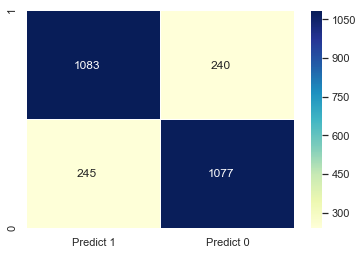

Confusion matrix for KNN


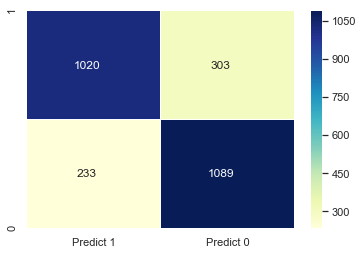

Confusion matrix for Naive Bayes


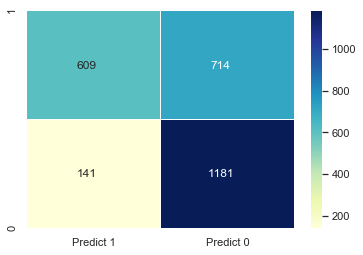

Confusion matrix for Support Vector Machine


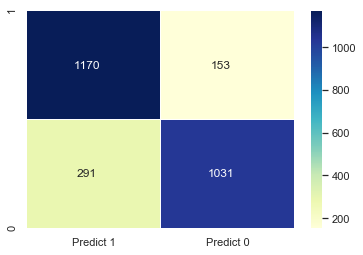

In [58]:
print("Confusion matrix for Logistic Regression")
conf_mat(lr_cm)

print("Confusion matrix for KNN")
conf_mat(f1_cm)
print("Confusion matrix for Naive Bayes")
conf_mat(nb_cm)
print("Confusion matrix for Support Vector Machine")
conf_mat(svm_cm)

In [59]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dt_tr_accuracy,dt_te_accuracy,dt_recall,dt_precision,dt_specificity,dt_f1_score,dt_cm = ensem_n_fit(dTree,X_train,y_train)

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dtr_tr_accuracy,dtr_te_accuracy,dtr_recall,dtr_precision,dtr_specificity,dtr_f1_score,dtr_cm = ensem_n_fit(dTreeR,X_train,y_train)

bgcl = BaggingClassifier(base_estimator=dTree, n_estimators=50,random_state=1)
bg_tr_accuracy,bg_te_accuracy,bg_recall,bg_precision,bg_specificity,bg_f1_score,bg_cm = ensem_n_fit(bgcl,X_train,y_train)

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
ab_tr_accuracy,ab_te_accuracy,ab_recall,ab_precision,ab_specificity,ab_f1_score,ab_cm = ensem_n_fit(abcl,X_train,y_train)

gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gb_tr_accuracy,gb_te_accuracy,gb_recall,gb_precision,gb_specificity,gb_f1_score,gb_cm = ensem_n_fit(gbcl,X_train,y_train)

rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rf_tr_accuracy,rf_te_accuracy,rf_recall,rf_precision,rf_specificity,rf_f1_score,rf_cm = ensem_n_fit(rfcl,X_train,y_train)

C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Welcome\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_s

In [60]:
result_en3 = pd.DataFrame({'Model' : ['dTree', 'dTreeR', 'Bagging', 'Ada Boosting', 'Gradient Boosting','Random Forest'],
                         'Training data Accuracy': [dt_tr_accuracy,dtr_tr_accuracy, bg_tr_accuracy, ab_tr_accuracy, gb_tr_accuracy, rf_tr_accuracy],
                          'Test data Accuracy': [dt_te_accuracy ,dtr_te_accuracy ,bg_te_accuracy ,ab_te_accuracy,gb_te_accuracy, rf_te_accuracy],
                          'Recall' : [dt_recall ,  dtr_recall ,  bg_recall, ab_recall, gb_recall,rf_recall ],
                          'Precision': [dt_precision ,dtr_precision ,bg_precision ,ab_precision, gb_precision,rf_recall ],
                          'Specificity': [dt_specificity ,dtr_specificity,bg_specificity,ab_specificity,gb_specificity,rf_specificity],
                          'F1 Score' : [dt_f1_score,dtr_f1_score,bg_f1_score,ab_f1_score,gb_f1_score,rf_f1_score]})
result_en3

,Model,Training data Accuracy,Test data Accuracy,Recall,Precision,Specificity,F1 Score
0,dTree,1.000,0.802,0.799,0.804,0.805,0.801
1,dTreeR,0.785,0.788,0.893,0.738,0.682,0.808
2,Bagging,1.000,0.859,0.868,0.852,0.849,0.860
3,Ada Boosting,0.795,0.798,0.834,0.779,0.763,0.806
4,Gradient Boosting,0.846,0.841,0.872,0.821,0.810,0.846
5,Random Forest,1.000,0.863,0.892,0.892,0.834,0.867


Confusion matrix for Decision Tree


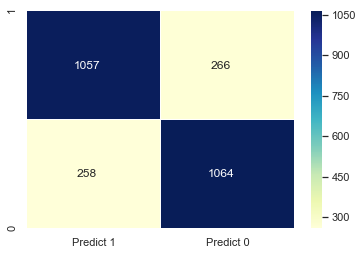

Confusion matrix for Regularized Decision Tree


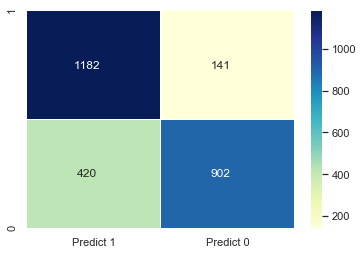

Confusion matrix for Bagging


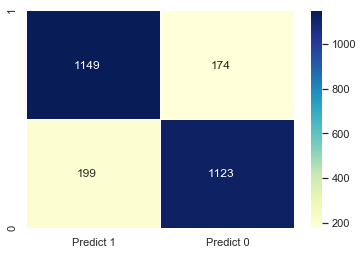

Confusion matrix for Ada Boosting


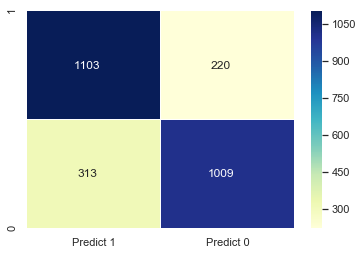

Confusion matrix for Gradient Boosting


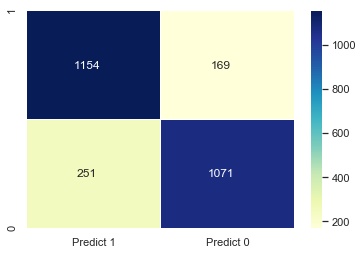

Confusion matrix for Random Forest


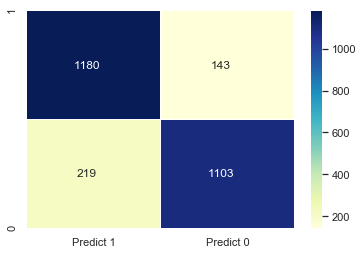

In [61]:
print("Confusion matrix for Decision Tree")
conf_mat(dt_cm)

print("Confusion matrix for Regularized Decision Tree")
conf_mat(dtr_cm)
print("Confusion matrix for Bagging")
conf_mat(bg_cm)
print("Confusion matrix for Ada Boosting")
conf_mat(ab_cm)
print("Confusion matrix for Gradient Boosting")
conf_mat(gb_cm)
print("Confusion matrix for Random Forest")
conf_mat(rf_cm)

# Best Result

In [62]:
result_en3

,Model,Training data Accuracy,Test data Accuracy,Recall,Precision,Specificity,F1 Score
0,dTree,1.000,0.802,0.799,0.804,0.805,0.801
1,dTreeR,0.785,0.788,0.893,0.738,0.682,0.808
2,Bagging,1.000,0.859,0.868,0.852,0.849,0.860
3,Ada Boosting,0.795,0.798,0.834,0.779,0.763,0.806
4,Gradient Boosting,0.846,0.841,0.872,0.821,0.810,0.846
5,Random Forest,1.000,0.863,0.892,0.892,0.834,0.867


# Conclusion: 
- **Random forest with downsampling the data seems to give better accuracy, recall and precision**
- **The data gives equal weightage to both set of datas such as data with Target = yes and data with Target = no**
- **The model also takes less number of data thus saving computation time. It also doesn't seem to overfit the data**